In [ ]:
!pip install seaborn
!pip install -U scikit-learn
!pip install wandb

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import logging
import tempfile
import os
import wandb
import pickle
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
#Set artifacts name

artifact_input_name = "flateam/students_adaptability/model_kmeans.pkl:v1"

artifact_type = "model_data"

artifact_test_name = "flateam/students_adaptability/test.csv:v0"



In [ ]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate wandb project
run = wandb.init(project="students_adaptability", job_type="test_data")

logger.info("Downloading and reading artifact")
artifact = run.use_artifact(artifact_input_name)
artifact_dir = artifact.download()

# Load the model
with open("/content/artifacts/model_kmeans.pkl:v1/model_kmeans.pkl", "rb") as f:
    kmeans_loaded = pickle.load(f)

logger.info("Downloading and reading artifact teste")
artifact_test = run.use_artifact(artifact_test_name)
artifact_path_test = artifact_test.file()
df = pd.read_csv(artifact_path_test)

kmeans_loaded

wandb:   1 of 1 files downloaded.  


KMeans(n_clusters=3, n_init=10)

In [ ]:
#Remove outliers
x = df.select_dtypes("int64").copy()
x = x.join(df.select_dtypes("float64").copy())


lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1


In [ ]:
df = df.loc[mask,:].copy()

In [ ]:
labels = df['Adaptivity Level']

data = df[["Gender", "Age", "Education Level", "Institution Type", "IT Student", "Location", "Load-shedding", "Financial Condition", "Internet Type","Network Type",
           "Class Duration", "Self Lms", "Device"]]

data = data.values

In [ ]:
y_kmeans = kmeans_loaded.predict(data)
y_kmeans

array([2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
accuracy = accuracy_score(labels.values, y_kmeans)
print(accuracy)

0.2727272727272727


In [ ]:
#send the raw_data.csv to wandb

!wandb artifact put \
      --name students_adaptability/model_kmeans.pkl \
      --type model \
      --description "K-means Model for Students Adaptability" model_kmeans.pkl

In [ ]:
run.finish()

## PCA

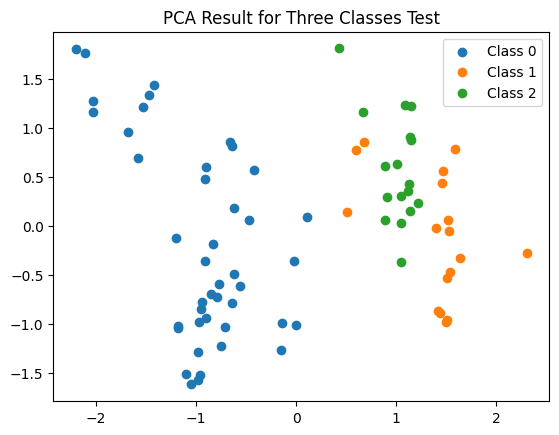

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(df)

pca_2d = pca.transform(df)


for label in set(labels):
    plt.scatter(pca_2d[y_kmeans == label, 0], pca_2d[y_kmeans == label, 1], label=f'Class {label}')

plt.title('PCA Result for Three Classes Test')
plt.legend()

plt.show()